## CS 4372.001 Computational Methods
## #Homework #1


### Students:
Scott Vu - SMV210000

Philip Wallis - PTW190000
#### Data we are using: Seoul Bike Sharing Demand 
https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand


In [1]:
# pip install statements
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 3.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 3.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Ignroe Python warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# imports here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def preprocess():
    """
    Datasets are found here: https://archive.ics.uci.edu/datasets
    Loading in Seoul Bike Sharing Demand found at: https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand
    Publicly Stored at: https://personal.utdallas.edu/~smv210000/SeoulBikeData.csv
    """
    data = pd.read_csv(
        "https://personal.utdallas.edu/~smv210000/SeoulBikeData.csv",
        sep=",",
        header=0,
        encoding="unicode_escape",
    )

    # CLEAN DATA

    # Remove null or NA values
    data = data.dropna()

    # Remove any redundant rows
    data = data.drop_duplicates()

    # Remove Unnecessary Columns - "Date", "Holiday", "Functioning Day"
    data = data.drop(["Date", "Holiday", "Functioning Day"], axis=1)

    # Convert categorical variables to numerical variables - Seasons
    data["Seasons"] = data["Seasons"].replace(
        {"Winter": 1, "Spring": 2, "Summer": 3, "Autumn": 4}
    )

    # Reorganize Columns, move Regressor Value to End of Dataframe
    data = data[
        [col for col in data.columns if col != "Rented Bike Count"]
        + ["Rented Bike Count"]
    ]

    """
        RETURNED COLUMNS
        
        [0] Hour - Hour of he day
        [1] Temperature-Temperature in Celsius
        [2] Humidity - %
        [3] Windspeed - m/s
        [4] Visibility - 10m
        [5] Dew point temperature - Celsius 
        [6] Solar radiation - MJ/m2
        [7] Rainfall - mm
        [8] Snowfall - cm
        [9] Seasons - Winter, Spring, Summer, Autumn -> 1/2/3/4
        [10] Rented Bike count - Count of bikes rented at each hour
    """

    return data

In [4]:
# Run this to get the data
data = preprocess()
data.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Rented Bike Count
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,254
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,204
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,173
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,107
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,78


<Axes: >

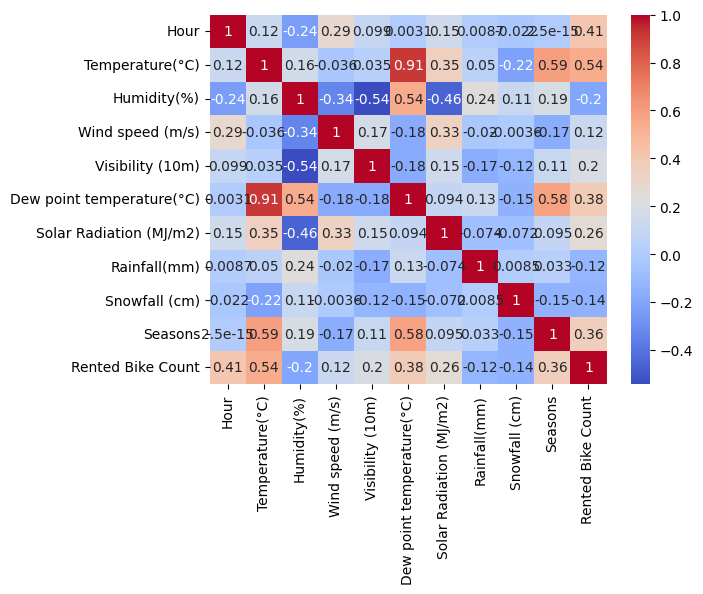

In [5]:
sns.heatmap(data = data.corr(), annot = True, cmap = "coolwarm")

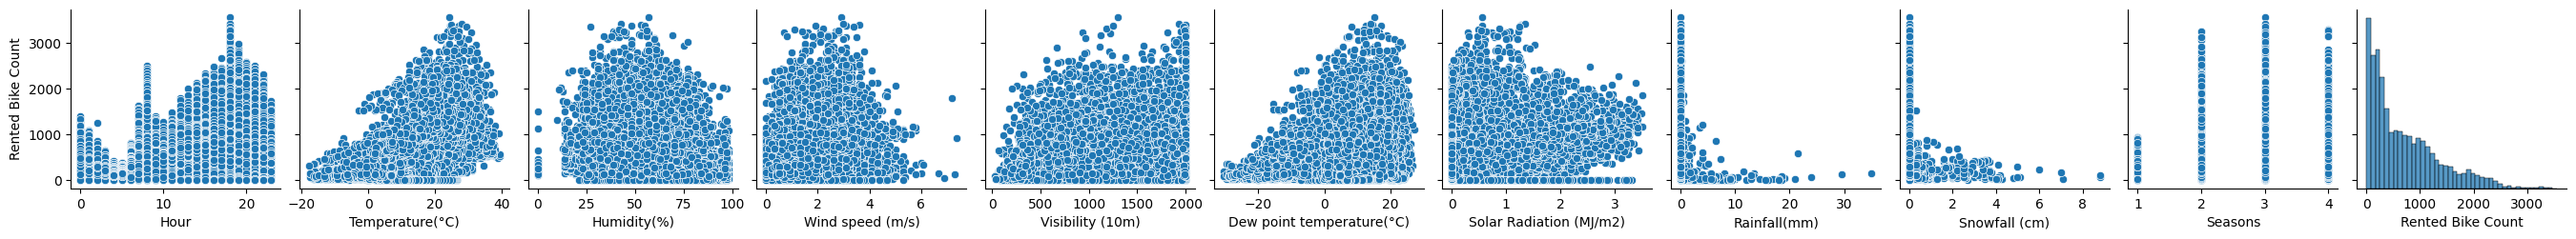

In [6]:
sns.pairplot(data, y_vars="Rented Bike Count")

In [7]:
# Split the independent and dependent variables

X = data[[
    "Hour", 
    "Temperature(°C)", 
    "Humidity(%)", 
    "Wind speed (m/s)",
    "Visibility (10m)",
    "Dew point temperature(°C)",
    "Solar Radiation (MJ/m2)",
    "Rainfall(mm)",
    "Snowfall (cm)",
    "Seasons" 
    ]]
y = data["Rented Bike Count"]

In [8]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
"""
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SGDRegressor()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(model.score(X_test_scaled, y_test))
"""

'\n# Scale the data\nscaler = StandardScaler()\nX_train_scaled = scaler.fit_transform(X_train)\nX_test_scaled = scaler.transform(X_test)\n\nmodel = SGDRegressor()\nmodel.fit(X_train_scaled, y_train)\ny_pred = model.predict(X_test_scaled)\nprint(model.score(X_test_scaled, y_test))\n'

In [10]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

# Iterate through variables to find the best model
# train_learning_rates = [1e-4, 1e-5, 1e-6, 1e-7]
train_learning_rates = 10.0 ** -np.arange(4, 8)

# train_iterations = [2, 4, 8, 16, ... 512, 1024]
train_iterations = 2 ** np.arange(1, 11)

# train tollerance = [1e-1, 1e-2, 1e-3, 1e-4]
train_tollerance = 10.0 ** -np.arange(1, 5)

# Holds Tuples of Iteration Data
best_model_sgdregressor = None
best_r2 = 0
            
"""
    Iterates through all combinations of learning rates, iterations, and tollerance (Variables defined in arrays above)
    Creates and fits a model for each combination, and tests it on the testing data
    Determines the r2 score of each model, and saves the best model
"""
for i in train_learning_rates:
    for j in train_iterations:
        for k in train_tollerance:
            model_sgdregressor = SGDRegressor(
                learning_rate="constant",
                eta0=i,
                max_iter=j,
                tol=k,
            )

            # Test the model (see if it works)
            model_sgdregressor.fit(X_train_scaled, y_train)
            y_pred = model_sgdregressor.predict(X_test_scaled)
            score = model_sgdregressor.score(X_test_scaled, y_test)

            if score > best_r2:
                best_r2 = score
                best_model_sgdregressor = model_sgdregressor

# Print best_model's information
print("Model: {}".format(best_model_sgdregressor))
print("R2 Score: {}".format(best_r2))
# Model Weights w0, w1, w2, ..., w9, w0=intercept 
print("Intercept: {}".format(best_model_sgdregressor.intercept_)) # the intercept shows the average effect of all the variables that are not in the model.
print("Coefficient: {}".format(best_model_sgdregressor.coef_))   # the coefficients show the average effect of each variable on the target variable.

Model: SGDRegressor(eta0=0.0001, learning_rate='constant', max_iter=32, tol=0.0001)
R2 Score: 0.47012147922622005
Intercept: [704.61889393]
Coefficient: [ 196.28806242  232.36785776 -199.3099611    13.87475416    2.86214266
  109.53064292  -61.64059231  -64.24351002   10.66794029   80.03928745]


In [11]:
# Check the accuracy of the model by using 
# CV score and MSE metrics.

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

cv_score = cross_val_score(best_model_sgdregressor, X_test_scaled, y_test, cv = 10)

print("CV mean score: ", cv_score.mean()) 


#predict the test data by using the trained model. We can check the accuracy of predicted data by using MSE and RMSE metrics. 
ypred = best_model_sgdregressor.predict(X_test_scaled)  # Predict using the linear model
mse = mean_squared_error(y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))

CV mean score:  0.45457216544153917
MSE:  213792.3883166186
RMSE:  462.37688990326774


In [18]:
#statsmodels linear regression
import statsmodels.api as sm

# Add constant to the model
X_train_off = sm.add_constant(X_train)
smRegression = sm.OLS(y_train, X_train_off)

# Fit the model
model_ols = smRegression.fit()
print(model_ols.summary())

                             OLS Regression Results                             
Dep. Variable:     Number of Bike Rides   R-squared:                       0.482
Model:                              OLS   Adj. R-squared:                  0.481
Method:                   Least Squares   F-statistic:                     650.0
Date:                  Thu, 28 Sep 2023   Prob (F-statistic):               0.00
Time:                          18:55:15   Log-Likelihood:                -53004.
No. Observations:                  7008   AIC:                         1.060e+05
Df Residuals:                      6997   BIC:                         1.061e+05
Df Model:                            10                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
co

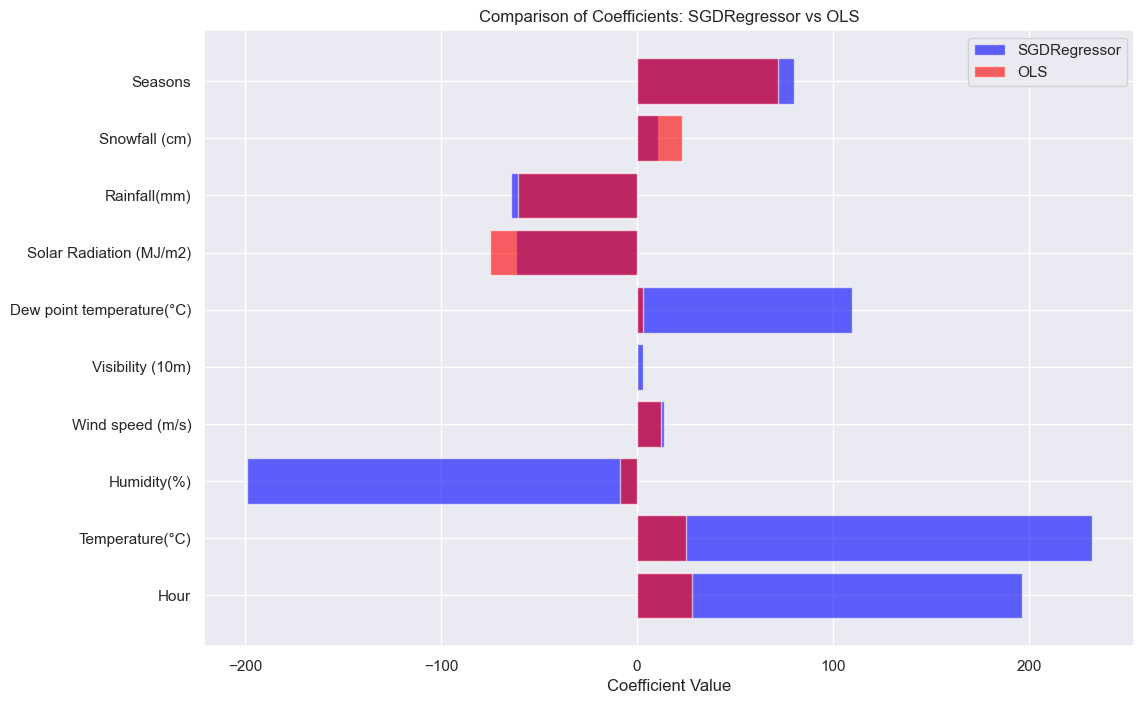

In [19]:
# Feature names
features = [
    'Hour', 
    'Temperature(°C)', 
    'Humidity(%)', 
    'Wind speed (m/s)', 
    'Visibility (10m)',
    'Dew point temperature(°C)', 
    'Solar Radiation (MJ/m2)',
    'Rainfall(mm)',
    'Snowfall (cm)',
    'Seasons' 
    ]
# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

sgd_coef = best_model_sgdregressor.coef_
ols_coef = model_ols.params[1:]

# Plotting the coefficients for SGDRegressor
ax.barh(features, sgd_coef, color='blue', alpha=0.6, label='SGDRegressor')

# Plotting the coefficients for OLS
ax.barh(features, ols_coef, color='red', alpha=0.6, label='OLS')

# Adding labels and title
ax.set_xlabel('Coefficient Value')
ax.set_title('Comparison of Coefficients: SGDRegressor vs OLS')
ax.legend()

plt.show()

In [21]:
sns.set_theme(style="darkgrid")

x_train_0 = np.ones((len(X_train), 1))
x_train_1 = np.array(X_train.iloc[:, 0]).reshape(-1, 1)
x_train_2 = np.array(X_train.iloc[:, 1]).reshape(-1, 1)
x_train_3 = np.array(X_train.iloc[:, 2]).reshape(-1, 1)
x_train_4 = np.array(X_train.iloc[:, 3]).reshape(-1, 1)
x_train_5 = np.array(X_train.iloc[:, 4]).reshape(-1, 1)
x_train_6 = np.array(X_train.iloc[:, 5]).reshape(-1, 1)
x_train_7 = np.array(X_train.iloc[:, 6]).reshape(-1, 1)
x_train_8 = np.array(X_train.iloc[:, 7]).reshape(-1, 1)
x_train_9 = np.array(X_train.iloc[:, 8]).reshape(-1, 1)
x_train_10 = np.array(X_train.iloc[:, 9]).reshape(-1, 1)


x_train_hs = np.hstack((x_train_0, x_train_1, x_train_2, x_train_3, x_train_4, x_train_5, x_train_6, x_train_7, x_train_8, x_train_9, x_train_10))

x_train_df = pd.DataFrame(x_train_hs, columns = [
    'Intercept',
    'Hour', 
    'Temperature(°C)', 
    'Humidity(%)', 
    'Wind speed (m/s)', 
    'Visibility (10m)',
    'Dew point temperature(°C)', 
    'Solar Radiation (MJ/m2)',
    'Rainfall(mm)',
    'Snowfall (cm)',
    'Seasons' ])

y_train.name = "Number of Bike Rides"

In [22]:
sgd_weights = best_model_sgdregressor.coef_
sgd_intercept = best_model_sgdregressor.intercept_
print("SGD Weights: ", sgd_weights)
print("SGD Intercept: ", sgd_intercept)

ols_weights = model_ols.params[1:].tolist()
ols_intercept = model_ols.params[0]
print("OLS Weights: ", ols_weights)
print("OLS Intercept: ", [ols_intercept])

SGD Weights:  [ 196.28806242  232.36785776 -199.3099611    13.87475416    2.86214266
  109.53064292  -61.64059231  -64.24351002   10.66794029   80.03928745]
SGD Intercept:  [704.61889393]
OLS Weights:  [28.238356744969533, 24.827847609443275, -8.463551655878906, 12.402490676431134, 0.005271346089105244, 3.099673422734322, -75.08112421220032, -60.826896988207444, 23.153483956075355, 71.9196901682095]
OLS Intercept:  [381.5402727663701]


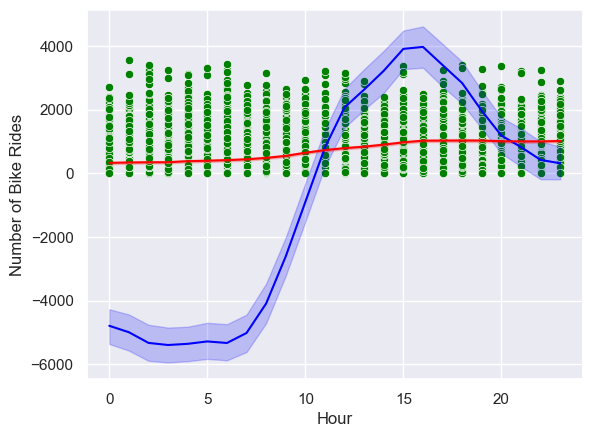

In [23]:
sns.scatterplot(x = x_train_df.iloc[:, 1], y = y_train, color="green")
sns.lineplot(x = x_train_df.iloc[:, 1], y = np.dot(X_train, sgd_weights[:]) + sgd_intercept, color="blue")
sns.lineplot(x = x_train_df.iloc[:, 1], y = np.dot(X_train, ols_weights[:]) + ols_intercept, color="red")

plt.show()

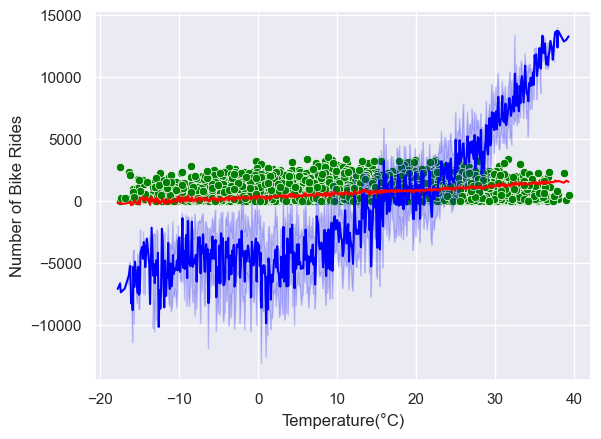

In [24]:
sns.scatterplot(x = x_train_df.iloc[:, 2], y = y_train, color="green")
sns.lineplot(x = x_train_df.iloc[:, 2], y = np.dot(X_train, sgd_weights[:]) + sgd_intercept, color="blue")
sns.lineplot(x = x_train_df.iloc[:, 2], y = np.dot(X_train, ols_weights[:]) + ols_intercept, color="red")

plt.show()

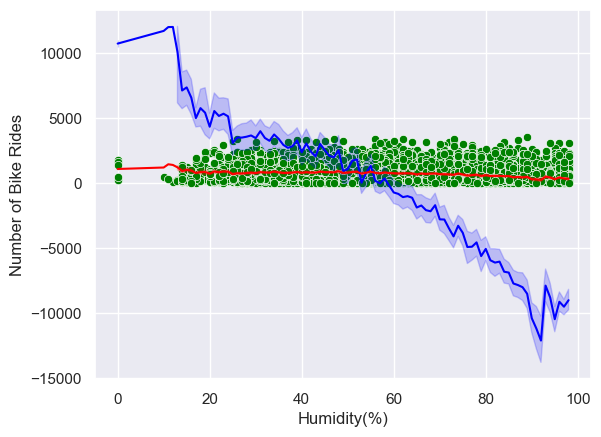

In [25]:
sns.scatterplot(x = x_train_df.iloc[:, 3], y = y_train, color="green")
sns.lineplot(x = x_train_df.iloc[:, 3], y = np.dot(X_train, sgd_weights[:]) + sgd_intercept, color="blue")
sns.lineplot(x = x_train_df.iloc[:, 3], y = np.dot(X_train, ols_weights[:]) + ols_intercept, color="red")

plt.show()

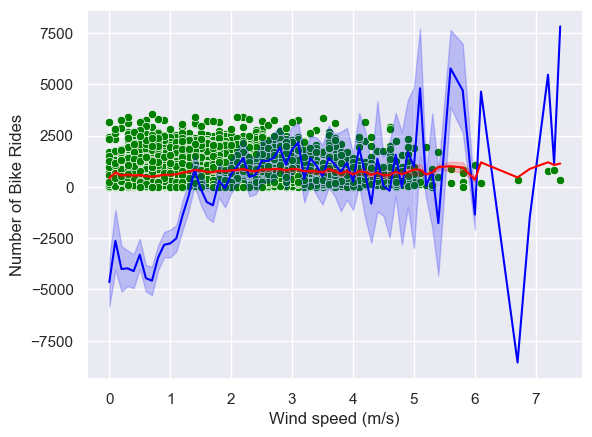

In [26]:
sns.scatterplot(x = x_train_df.iloc[:, 4], y = y_train, color="green")
sns.lineplot(x = x_train_df.iloc[:, 4], y = np.dot(X_train, sgd_weights[:]) + sgd_intercept, color="blue")
sns.lineplot(x = x_train_df.iloc[:, 4], y = np.dot(X_train, ols_weights[:]) + ols_intercept, color="red")

plt.show()

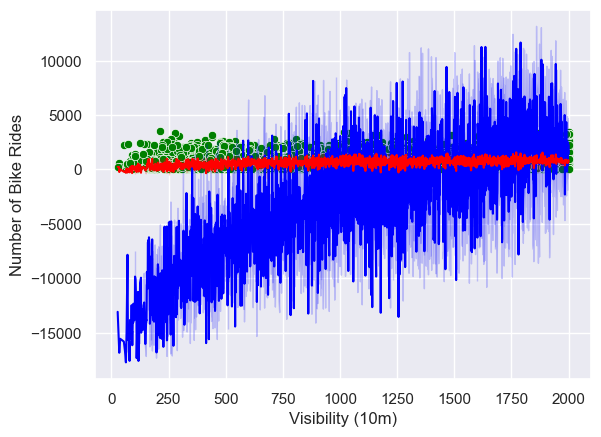

In [27]:
sns.scatterplot(x = x_train_df.iloc[:, 5], y = y_train, color="green")
sns.lineplot(x = x_train_df.iloc[:, 5], y = np.dot(X_train, sgd_weights[:]) + sgd_intercept, color="blue")
sns.lineplot(x = x_train_df.iloc[:, 5], y = np.dot(X_train, ols_weights[:]) + ols_intercept, color="red")

plt.show()

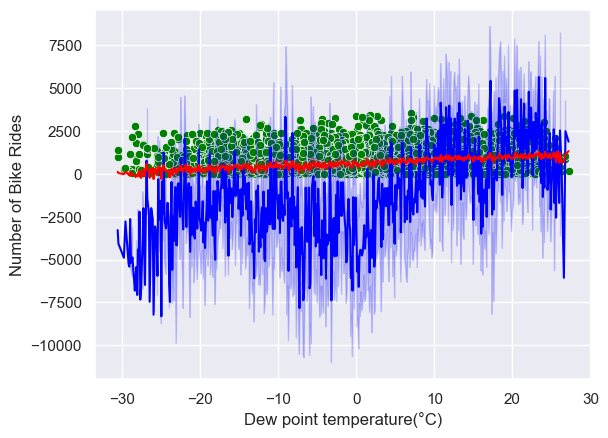

In [28]:
sns.scatterplot(x = x_train_df.iloc[:, 6], y = y_train, color="green")
sns.lineplot(x = x_train_df.iloc[:, 6], y = np.dot(X_train, sgd_weights[:]) + sgd_intercept, color="blue")
sns.lineplot(x = x_train_df.iloc[:, 6], y = np.dot(X_train, ols_weights[:]) + ols_intercept, color="red")

plt.show()

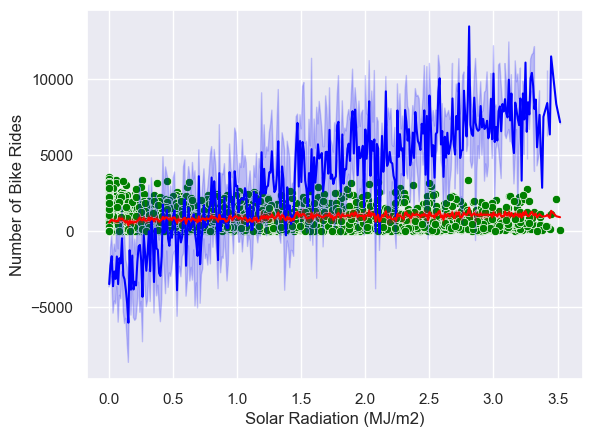

In [29]:
sns.scatterplot(x = x_train_df.iloc[:, 7], y = y_train, color="green")
sns.lineplot(x = x_train_df.iloc[:, 7], y = np.dot(X_train, sgd_weights[:]) + sgd_intercept, color="blue")
sns.lineplot(x = x_train_df.iloc[:, 7], y = np.dot(X_train, ols_weights[:]) + ols_intercept, color="red")

plt.show()

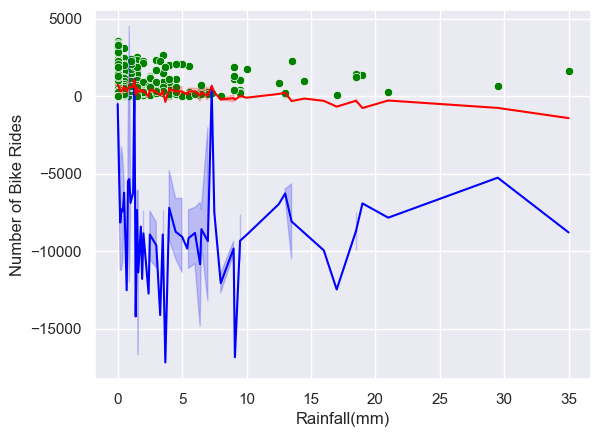

In [30]:
sns.scatterplot(x = x_train_df.iloc[:, 8], y = y_train, color="green")
sns.lineplot(x = x_train_df.iloc[:, 8], y = np.dot(X_train, sgd_weights[:]) + sgd_intercept, color="blue")
sns.lineplot(x = x_train_df.iloc[:, 8], y = np.dot(X_train, ols_weights[:]) + ols_intercept, color="red")

plt.show()

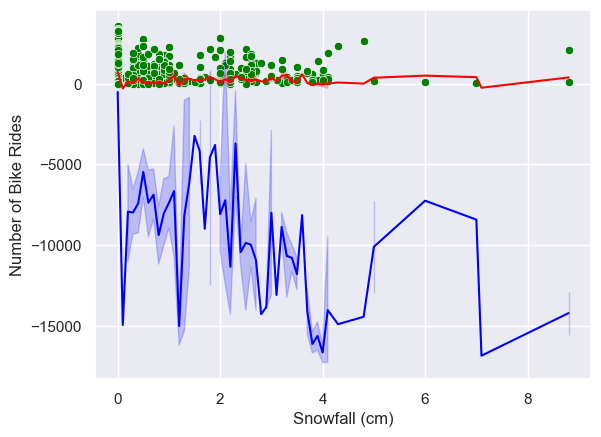

In [31]:
sns.scatterplot(x = x_train_df.iloc[:, 9], y = y_train, color="green")
sns.lineplot(x = x_train_df.iloc[:, 9], y = np.dot(X_train, sgd_weights[:]) + sgd_intercept, color="blue")
sns.lineplot(x = x_train_df.iloc[:, 9], y = np.dot(X_train, ols_weights[:]) + ols_intercept, color="red")

plt.show()

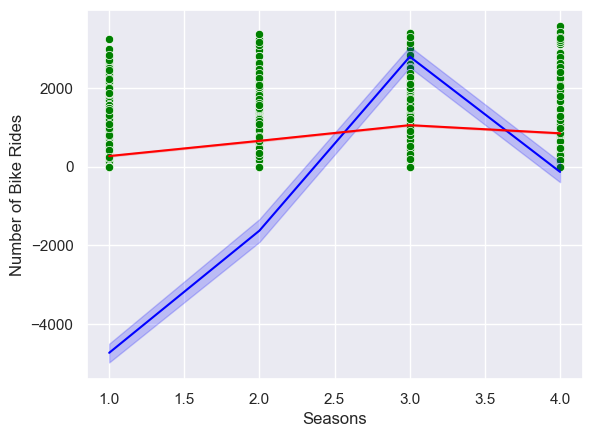

In [32]:
sns.scatterplot(x = x_train_df.iloc[:, 10], y = y_train, color="green")
sns.lineplot(x = x_train_df.iloc[:, 10], y = np.dot(X_train, sgd_weights[:]) + sgd_intercept, color="blue")
sns.lineplot(x = x_train_df.iloc[:, 10], y = np.dot(X_train, ols_weights[:]) + ols_intercept, color="red")

plt.show()